In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import MinMaxScaler
import seaborn as sns
# import 
from statsmodels.tsa.stattools import adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [2]:
df = pd.read_excel(r'D:\MSc Software and AI\Team Project\TurbineTeamProject\data\dundalk_2020.xlsx')

In [3]:
df.set_index(['Timestamps'], inplace= True)

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 10097 entries, 2020-01-01 00:00:00 to 2020-03-12 12:20:00
Data columns (total 21 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   WindSpeed        10097 non-null  float64
 1   StdDevWindSpeed  10097 non-null  float64
 2   WindDirAbs       10097 non-null  float64
 3   WindDirRel       10097 non-null  float64
 4   Power            10097 non-null  float64
 5   MaxPower         10097 non-null  float64
 6   MinPower         10097 non-null  float64
 7   StdDevPower      10097 non-null  float64
 8   AvgRPow          10097 non-null  float64
 9   Pitch            10097 non-null  float64
 10  GenRPM           10097 non-null  int64  
 11  RotorRPM         10097 non-null  float64
 12  EnvirTemp        10097 non-null  int64  
 13  NacelTemp        10097 non-null  int64  
 14  GearOilTemp      10097 non-null  int64  
 15  GearBearTemp     10097 non-null  int64  
 16  GenTemp          10097 

In [5]:
minmax = MinMaxScaler()
df_scaled = df.copy()
df_scaled[df.columns] = minmax.fit_transform(df)

In [6]:
df_scaled

,WindSpeed,StdDevWindSpeed,WindDirAbs,WindDirRel,Power,MaxPower,MinPower,StdDevPower,AvgRPow,Pitch,...,RotorRPM,EnvirTemp,NacelTemp,GearOilTemp,GearBearTemp,GenTemp,GenPh1Temp,GenPh2Temp,GenPh3Temp,GenBearTemp
Timestamps,,,,,,,,,,,,,,,,,,,,,
2020-01-01 00:00:00,0.117021,0.090909,0.427419,0.477737,0.004209,0.003445,0.049496,0.001437,0.521739,0.032731,...,0.704981,0.615385,0.8125,0.568182,0.672727,0.0,0.262626,0.262626,0.287234,0.60
2020-01-01 00:10:00,0.138298,0.136364,0.456062,0.507701,0.004092,0.003445,0.049496,0.001437,0.510870,0.033860,...,0.724138,0.615385,0.8750,0.590909,0.709091,0.0,0.262626,0.262626,0.287234,0.62
2020-01-01 00:20:00,0.138298,0.113636,0.488042,0.511901,0.004092,0.003445,0.049496,0.001437,0.510870,0.038375,...,0.766284,0.615385,0.8750,0.590909,0.727273,0.0,0.262626,0.262626,0.287234,0.62
2020-01-01 00:30:00,0.127660,0.090909,0.524472,0.508821,0.003975,0.003445,0.049609,0.001437,0.510870,0.036117,...,0.750958,0.615385,0.8750,0.590909,0.727273,0.0,0.262626,0.262626,0.287234,0.64
2020-01-01 00:40:00,0.132979,0.090909,0.558954,0.507981,0.004209,0.003445,0.049496,0.001197,0.521739,0.036117,...,0.727969,0.615385,0.8750,0.590909,0.727273,0.0,0.262626,0.262626,0.287234,0.64
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-03-12 11:40:00,0.861702,0.659091,0.694105,0.491739,0.996843,0.989343,0.747990,0.058908,0.597826,0.147856,...,1.000000,0.384615,0.5000,0.954545,0.963636,0.0,0.878788,0.898990,0.872340,0.82
2020-03-12 11:50:00,0.829787,0.704545,0.691880,0.504341,0.984684,0.981593,0.694869,0.126676,0.597826,0.136569,...,1.000000,0.384615,0.5000,0.954545,0.963636,0.0,0.888889,0.909091,0.882979,0.82
2020-03-12 12:00:00,0.797872,0.636364,0.687152,0.499580,0.992517,0.982670,0.696115,0.089080,0.597826,0.123025,...,1.000000,0.461538,0.5625,0.954545,0.963636,0.0,0.898990,0.919192,0.893617,0.84


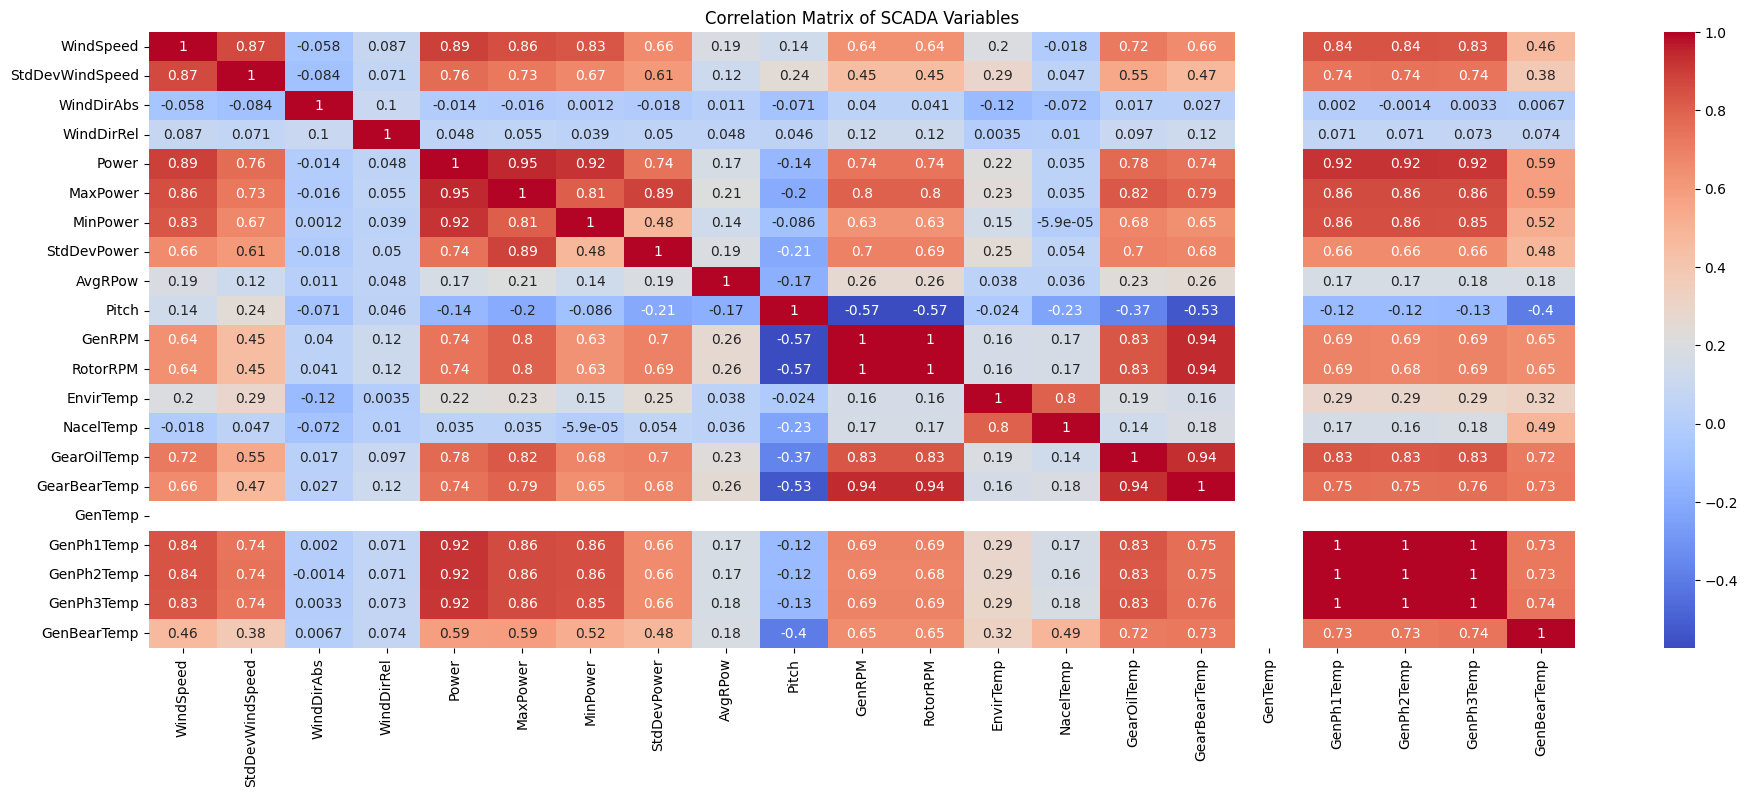

In [7]:
# Correlation matrix
plt.figure(figsize=(23,8))
sns.heatmap(df_scaled.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Matrix of SCADA Variables")
plt.show()

In [8]:
corr_matrix = df_scaled.corr()

In [9]:
#  Get correlations with the target column
target_corr = corr_matrix["Power"].drop("Power", errors="ignore")

# Get feature names where correlation is greater than the threshold
high_corr_features = target_corr[abs(target_corr) > 0.70].index.tolist()

# Print the list of highly correlated features
print("Columns with high correlation:", high_corr_features)

Columns with high correlation: ['WindSpeed', 'StdDevWindSpeed', 'MaxPower', 'MinPower', 'StdDevPower', 'GenRPM', 'RotorRPM', 'GearOilTemp', 'GearBearTemp', 'GenPh1Temp', 'GenPh2Temp', 'GenPh3Temp']


In [10]:
high_corr_features.append('Power')

In [11]:
high_corr_features

['WindSpeed',
 'StdDevWindSpeed',
 'MaxPower',
 'MinPower',
 'StdDevPower',
 'GenRPM',
 'RotorRPM',
 'GearOilTemp',
 'GearBearTemp',
 'GenPh1Temp',
 'GenPh2Temp',
 'GenPh3Temp',
 'Power']

In [12]:
df_corr = df_scaled[high_corr_features]

In [13]:
df_corr_jan= df_corr.loc['2020-01-01':'2020-01-31']

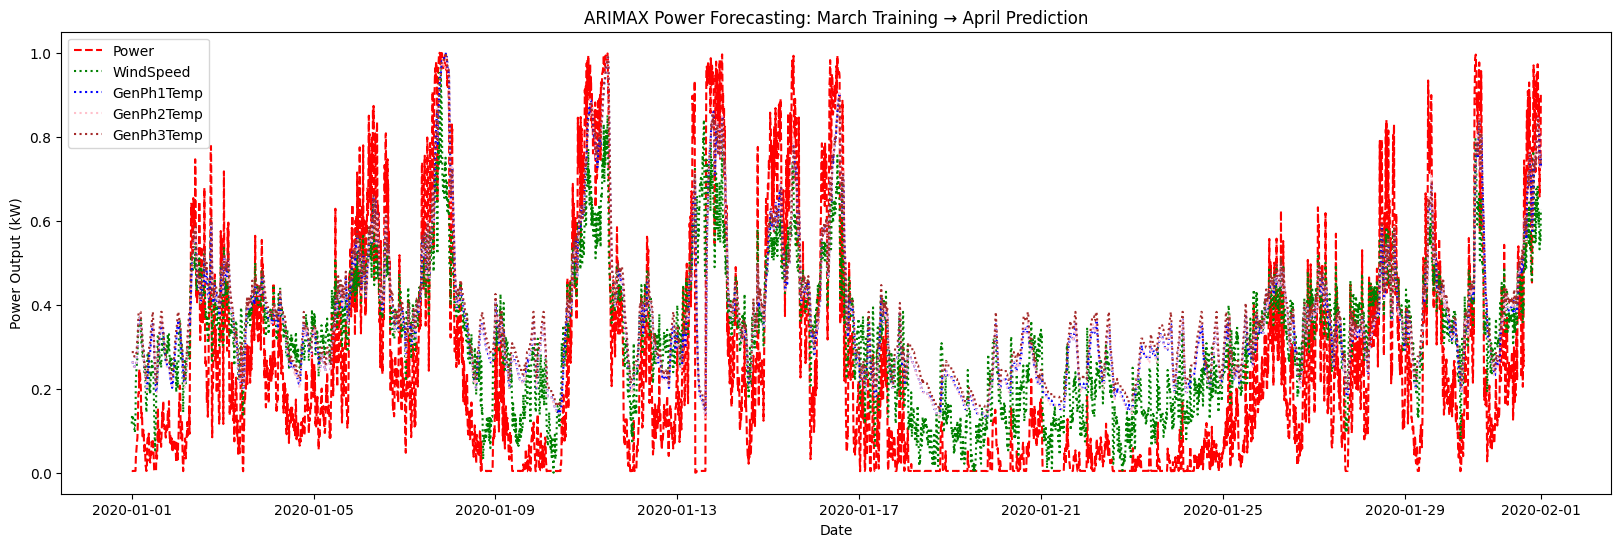

In [14]:
plt.figure(figsize=(20,6))

# # Plot actual test data
# plt.plot(test_y.index, test_y, label="Actual Power Output", color="blue")

# Plot predicted data
plt.plot(df_corr_jan.index, df_corr_jan['Power'], label="Power", 
         color="red", linestyle="dashed")

plt.plot(df_corr_jan.index, df_corr_jan['WindSpeed'], label="WindSpeed", 
         color="green", linestyle="dotted")

plt.plot(df_corr_jan.index, df_corr_jan['GenPh1Temp'], label="GenPh1Temp", 
         color="blue", linestyle="dotted")

plt.plot(df_corr_jan.index, df_corr_jan['GenPh2Temp'], label="GenPh2Temp", 
         color="pink", linestyle="dotted")

plt.plot(df_corr_jan.index, df_corr_jan['GenPh3Temp'], label="GenPh3Temp", 
         color="brown", linestyle="dotted")


plt.xlabel("Date")
plt.ylabel("Power Output (kW)")
plt.title("ARIMAX Power Forecasting: March Training → April Prediction")
plt.legend()
plt.show()


In [15]:
train_data = df_corr.loc['2020-01-01':'2020-01-31']
test_data = df_corr.loc['2020-02-01':'2020-02-02']

In [16]:
train_X, train_y = train_data.drop(['Power'], axis=1), train_data['Power']
test_X, test_y = test_data.drop(['Power'], axis=1), test_data['Power']

In [17]:
# Define SARIMAX model (ARIMA + wind speed as exogenous variable)
p=2
q=1
model = SARIMAX(train_y, exog=train_X, order=(p, 1, q))

# Fit model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


c:\Users\rsaxe\.conda\envs\yolov8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\rsaxe\.conda\envs\yolov8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\rsaxe\.conda\envs\yolov8\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


                               SARIMAX Results                                
Dep. Variable:                  Power   No. Observations:                 4464
Model:               SARIMAX(2, 1, 1)   Log Likelihood                9162.771
Date:                Sun, 23 Feb 2025   AIC                         -18293.541
Time:                        13:28:00   BIC                         -18191.084
Sample:                    01-01-2020   HQIC                        -18257.424
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
WindSpeed           0.7041      0.011     62.177      0.000       0.682       0.726
StdDevWindSpeed    -0.0260      0.009     -3.001      0.003      -0.043      -0.009
MaxPower            0.2527      

In [29]:
start_date = test_y.index[0]
start_date

Timestamp('2020-02-01 00:00:00')

In [30]:
test_y.index[-1] 

Timestamp('2020-02-01 08:00:00')

In [18]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Use actual timestamps for start and end
start_date = test_y.index[0]  # First timestamp of test data
end_date = test_y.index[-1]   # Last timestamp of test data

# Make predictions using the actual timestamps
predictions = model_fit.predict(start=start_date, end=end_date, exog=test_X)

# Evaluate performance
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
mpe = mean_absolute_percentage_error(test_y, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"mean_absolute_percentage_error: {mpe}")



Mean Absolute Error (MAE): 0.04904173073917471
Root Mean Squared Error (RMSE): 0.06478406514513968
mean_absolute_percentage_error: 4.442357774292416


In [19]:
predictions_df = pd.DataFrame({'timestamp': test_y.index, 'predicted_power': predictions})
predictions_df.set_index('timestamp', inplace=True)
print(predictions_df.head())



                     predicted_power
timestamp                           
2020-02-01 00:00:00         0.845054
2020-02-01 00:10:00         0.881196
2020-02-01 00:20:00         0.838704
2020-02-01 00:30:00         0.819735
2020-02-01 00:40:00         0.800770


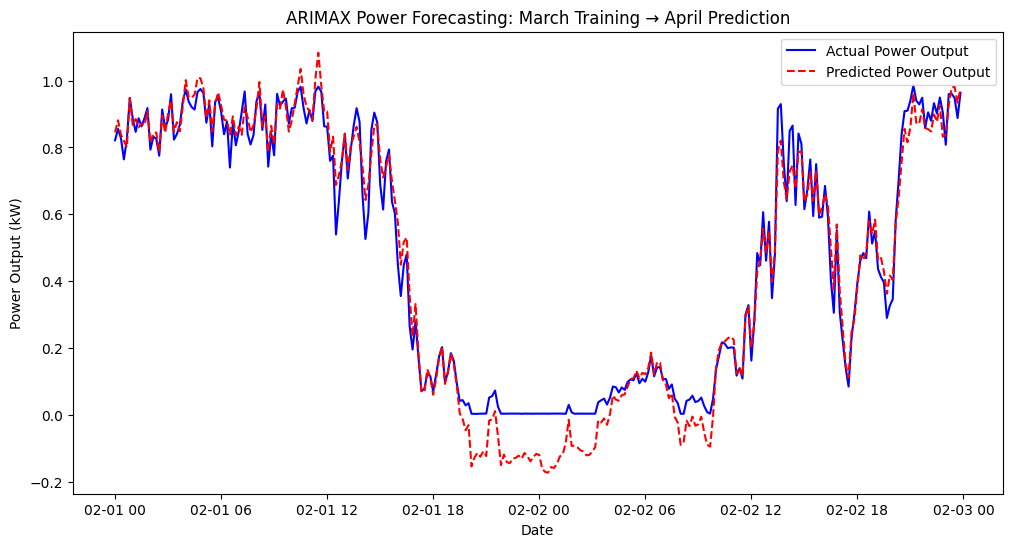

In [20]:
plt.figure(figsize=(12,6))

# Plot actual test data
plt.plot(test_y.index, test_y, label="Actual Power Output", color="blue")

# Plot predicted data
plt.plot(predictions_df.index, predictions_df['predicted_power'], label="Predicted Power Output", 
         color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Power Output (kW)")
plt.title("ARIMAX Power Forecasting: March Training → April Prediction")
plt.legend()
plt.show()


## 8 Hrs

In [21]:
# train_size = int(len(df_scaled) * 0.95)

train_data = df_corr.loc['2020-01-01':'2020-01-31']
test_data = df_corr.loc['2020-02-01 00:00:00':'2020-02-01 08:00:00']


In [22]:
train_X, train_y = train_data.drop(['Power'], axis=1), train_data['Power']
test_X, test_y = test_data.drop(['Power'], axis=1), test_data['Power']

In [23]:
# Define SARIMAX model (ARIMA + wind speed as exogenous variable)
p=2
q=1
model = SARIMAX(train_y, exog=train_X, order=(p, 1, q))

# Fit model
model_fit = model.fit()

# Print model summary
print(model_fit.summary())


c:\Users\rsaxe\.conda\envs\yolov8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)
c:\Users\rsaxe\.conda\envs\yolov8\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: No frequency information was provided, so inferred frequency 10min will be used.
  self._init_dates(dates, freq)


                               SARIMAX Results                                
Dep. Variable:                  Power   No. Observations:                 4464
Model:               SARIMAX(2, 1, 1)   Log Likelihood                9162.771
Date:                Sun, 23 Feb 2025   AIC                         -18293.541
Time:                        13:28:08   BIC                         -18191.084
Sample:                    01-01-2020   HQIC                        -18257.424
                         - 01-31-2020                                         
Covariance Type:                  opg                                         
                      coef    std err          z      P>|z|      [0.025      0.975]
-----------------------------------------------------------------------------------
WindSpeed           0.7041      0.011     62.177      0.000       0.682       0.726
StdDevWindSpeed    -0.0260      0.009     -3.001      0.003      -0.043      -0.009
MaxPower            0.2527      

c:\Users\rsaxe\.conda\envs\yolov8\lib\site-packages\statsmodels\base\model.py:607: ConvergenceWarning: Maximum Likelihood optimization failed to converge. Check mle_retvals
  warnings.warn("Maximum Likelihood optimization failed to "


In [24]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_absolute_percentage_error
# Use actual timestamps for start and end
start_date = test_y.index[0]  # First timestamp of test data
end_date = test_y.index[-1]   # Last timestamp of test data

# Make predictions using the actual timestamps
predictions = model_fit.predict(start=start_date, end=end_date, exog=test_X)

# Evaluate performance
mae = mean_absolute_error(test_y, predictions)
mse = mean_squared_error(test_y, predictions)
mpe = mean_absolute_percentage_error(test_y, predictions)
rmse = np.sqrt(mse)

print(f"Mean Absolute Error (MAE): {mae}")
print(f"Root Mean Squared Error (RMSE): {rmse}")
print(f"mean_absolute_percentage_error: {mpe}")



Mean Absolute Error (MAE): 0.02563744936144058
Root Mean Squared Error (RMSE): 0.03109952906826874
mean_absolute_percentage_error: 0.029853496227066307


In [25]:
predictions_df = pd.DataFrame({'timestamp': test_y.index, 'predicted_power': predictions})
predictions_df.set_index('timestamp', inplace=True)
print(predictions_df.head())



                     predicted_power
timestamp                           
2020-02-01 00:00:00         0.845054
2020-02-01 00:10:00         0.881196
2020-02-01 00:20:00         0.838704
2020-02-01 00:30:00         0.819735
2020-02-01 00:40:00         0.800770


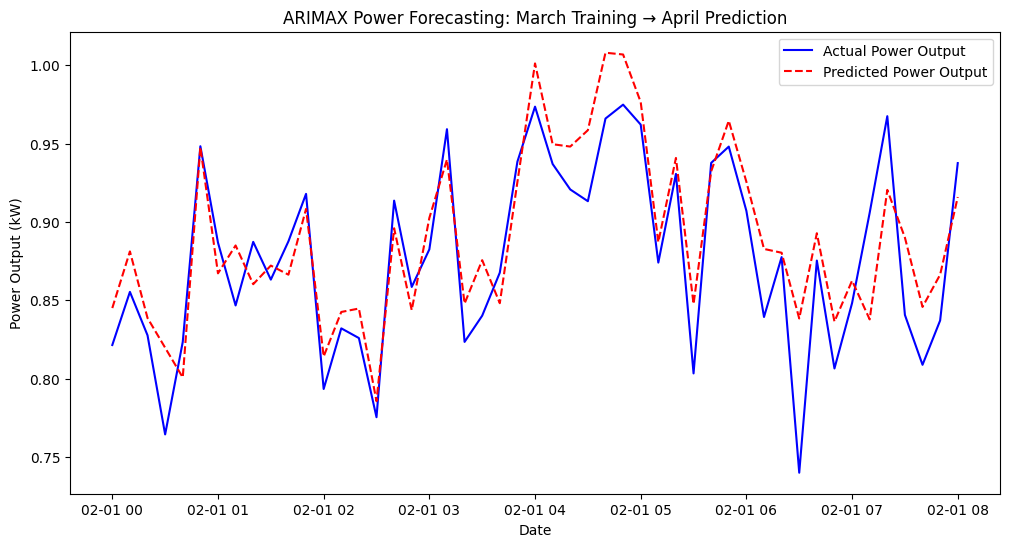

In [26]:
plt.figure(figsize=(12,6))

# Plot actual test data
plt.plot(test_y.index, test_y, label="Actual Power Output", color="blue")

# Plot predicted data
plt.plot(predictions_df.index, predictions_df['predicted_power'], label="Predicted Power Output", 
         color="red", linestyle="dashed")

plt.xlabel("Date")
plt.ylabel("Power Output (kW)")
plt.title("ARIMAX Power Forecasting: March Training → April Prediction")
plt.legend()
plt.show()


In [27]:
# 1. Forecasting Wind Power based WInd Speed Variables
# 2. 